<div align="center" style="width: 100%; background-color: #F7F7F7; margin-bottom: 3em;">
    <h1 style="font-family: courier; color: #AF4545; font-size: 4em; padding-top: .5em;"><b>911 calls</b></h1>
    <img src="../img/911-calls.png">    
</div>

# Data Exploration

---

## 911 Calls 

Projeto de exploração de dados sobre os dados de chamadas do 911 disponível no [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)


In [3]:
import requests

url = 'https://meriatdatasets.blob.core.windows.net/public/911.csv'
myfile = requests.get(url, allow_redirects=True)
open('../data/911.csv', 'wb').write(myfile.content)

78512019

In [6]:
import numpy as np
import pandas as pd

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#sns.set_style('whitegrid')
#plt.style.use('seaborn-darkgrid')
plt.rc('lines', linewidth=2)
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

plt.rc('legend', fontsize=12)     
plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=22)
plt.rc('xtick', labelsize=14)     
plt.rc('ytick', labelsize=14)

In [169]:
df = pd.read_csv('../data/911.csv')

Como descrição, podemos ver que é um dataframe com cerca de 100k entradas, e 9 colunas.

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [171]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


## Perguntas básicas

#### Quais são os top 5 CEPs nas chamadas 911?

In [172]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

#### Quais são os 5 principais municípios nas chamadas 911?

In [173]:
df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

#### Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem?

Uso o método `nunique` para obter o **count** em vez de utilizar o `len()` sobre o dataset.

In [174]:
df['title'].nunique()

141

## Criando novos recursos

Na coluna **title** existem **Razões/Departamentos** especificados antes do código do título. Estes são **EMS**, **Fire** e **Traffic**. Use `apply()` com uma expressão lambda personalizada para criar uma nova coluna chamada **Razão** que contém esse valor de string.

Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.

In [175]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?

In [176]:
df['reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reason, dtype: int64

Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna.

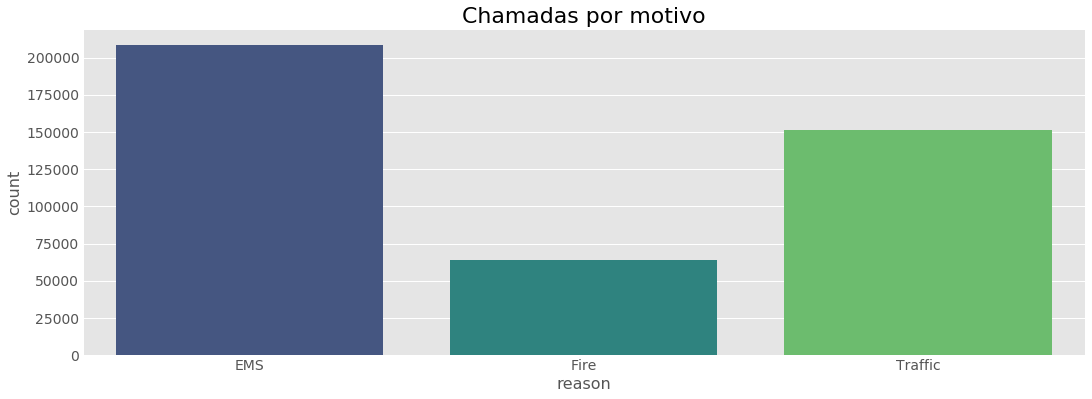

In [177]:
plt.figure(figsize=(16, 6))

sns.countplot(x='reason',data=df,palette='viridis')
plt.title('Chamadas por motivo')
plt.show()

Agora vamos começar a focar em informações de tempo. Já vimos que a coluna **timeStamp** é do tipo object, neste caso str.

Para realizar nosso estudo de forma eficaz, vou utilizar a função [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. Logo em seguida estou excluíndo a coluna original utilizando o método drop e aplicando essa alteração sobre o dataframe original com o parametro inpalce.

In [178]:
print(type(df['timeStamp'].iloc[0]))

df['time_stamp'] = pd.to_datetime(df['timeStamp'])
df.drop("timeStamp", axis=1, inplace=True)

<class 'str'>


Dado essa alteração, podemos trabalhar agora com os atributos de um datetime, como por exemplo:

```python
time = df['timeStamp'].iloc[0]
time.hour
```

Agora que a coluna timestamp é realmente um objeto do tipo DateTime, vou utilizar o método `apply()` para criar 3 novas colunas chamadas `Hour`, `Month` e `Day of Week`.

In [179]:
df['hour'] = df['time_stamp'].apply(lambda time: time.hour)
df['month'] = df['time_stamp'].apply(lambda time: time.month)
df['year'] = df['time_stamp'].apply(lambda time: time.year)
df['day_of_week'] = df['time_stamp'].apply(lambda time: time.dayofweek)

Observe como o dia da demana é um número inteiro de 0-6. Vamos utilizar o método `map()` para mapear um determinado dicionário com os nomes das sequências reais para o dia da semana:

In [180]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [181]:
df['day_of_week'] = df['day_of_week'].map(dmap)

In [182]:
df.head()

,lat,lng,desc,zip,title,twp,addr,e,reason,time_stamp,hour,month,year,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,17,12,2015,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,17,12,2015,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,14,12,2015,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:36,16,12,2015,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:52,16,12,2015,Thu


### countplot da coluna "Day of Week" 

A tonalidade é baseada na coluna **`reason`**.

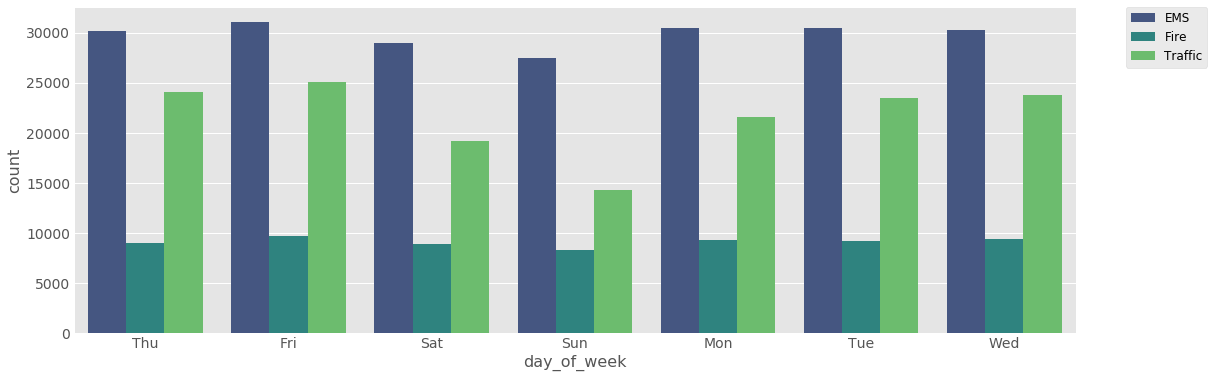

In [183]:
plt.figure(figsize=(16, 6))
sns.countplot(x='day_of_week',data=df,hue='reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### countplot da coluna "month"

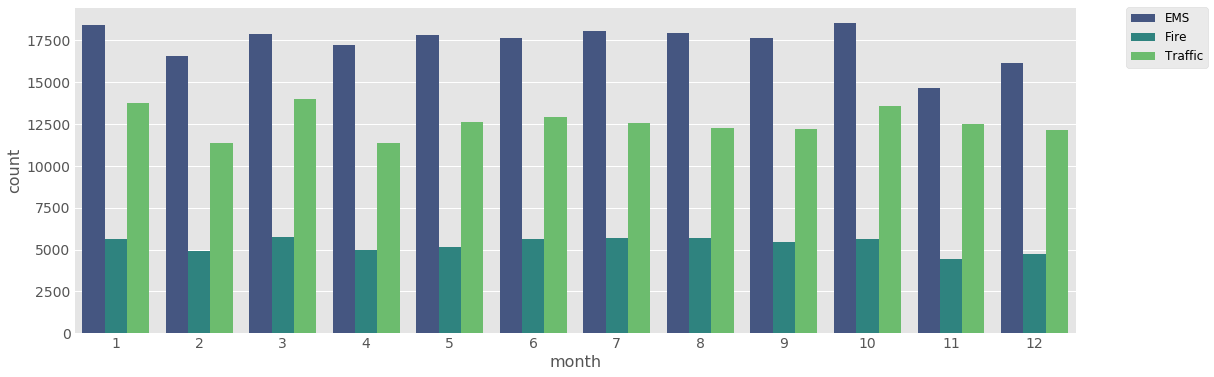

In [184]:
plt.figure(figsize=(16, 6))
sns.countplot(x='month',data=df,hue='reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Vou utilizar uma visualização baseada em linha para facilitar a abstração dos dados gerais em relação aos meses. 

Agora, crie um objeto groupby chamado **"byMonth"**, onde você agrupa o DataFrame pela coluna do mês e use o método `count()` para agregação. Use o método `head()` neste DataFrame retornado.

In [185]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,twp,addr,e,reason,time_stamp,hour,year,day_of_week
month,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37812,37824,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32817,32828,32828,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37651,37666,37666,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33575,33583,33583,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35628,35644,35644,35644,35644,35644,35644,35644


### Contagem de chamadas por mês

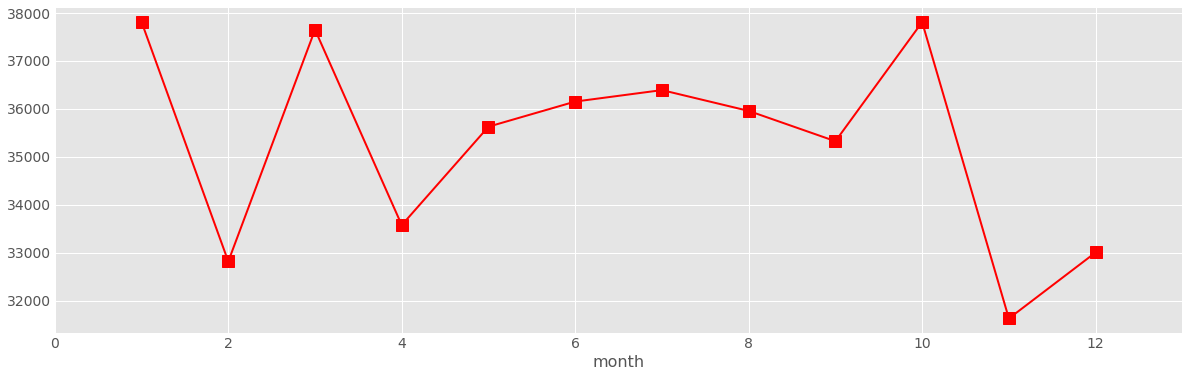

In [186]:
plt.figure(figsize=(18, 6))

# Could be any column
byMonth['twp'].plot(marker = 's', ms=12, color = 'red')
plt.xlim(xmin=0, xmax=13)
plt.show()

### Modelo linear by month

Agora vamos gerar um modelo linar do número de chamdas por mês, utilizando o `lmplot()` do **Seaborn**.

Para que isso será necessário utilizar o método `reset_index()` a fim de transformar a coluna de index em uma coluna padrão. Isso vai nos permitir acessá-la a fim de gerar nosso modelo. A área em azul claro, indica qual o erro do nosso modelo. É possível perceber que o erro tende a aumentar conforme a fuga do padrão dos dados. O erro é menor mais próximo ao centro, onde temos uma maior concentração de informação.

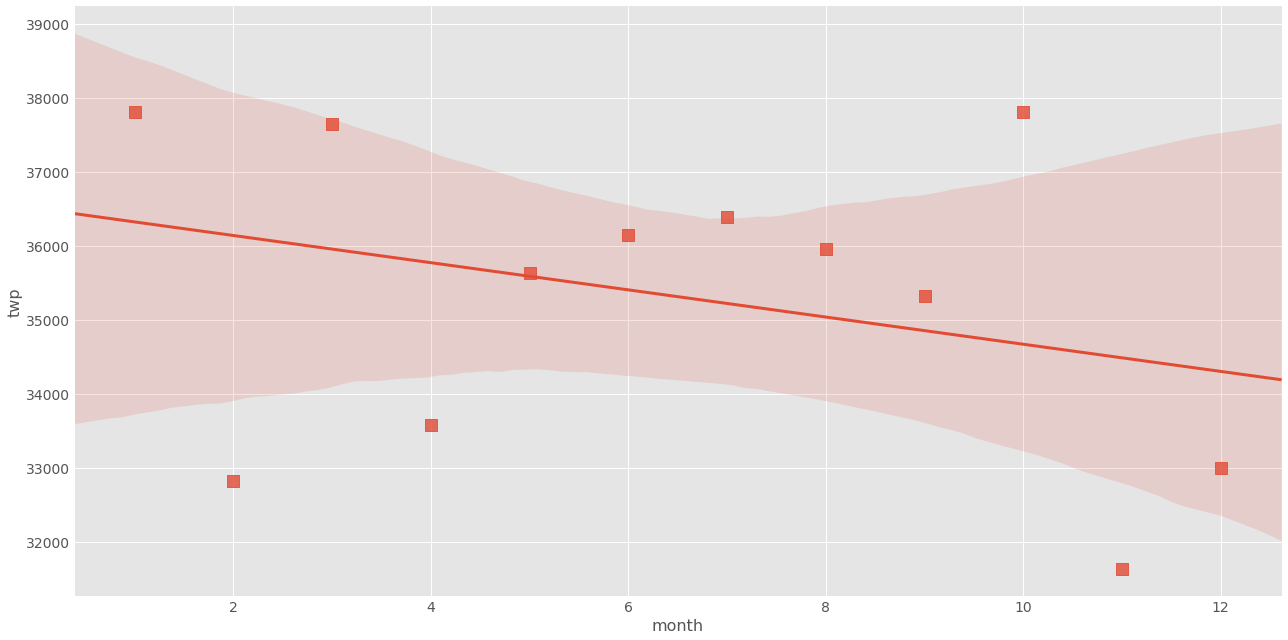

In [187]:
sns.lmplot(x='month', y='twp', data=byMonth.reset_index(), height=9, aspect=2, scatter_kws={"s": 150}, markers="s")

plt.show()

Criando uma coluna **date** com apenas a a data do objeto timeStamp.

In [188]:
df['date'] = df['time_stamp'].apply(lambda t: t.date())

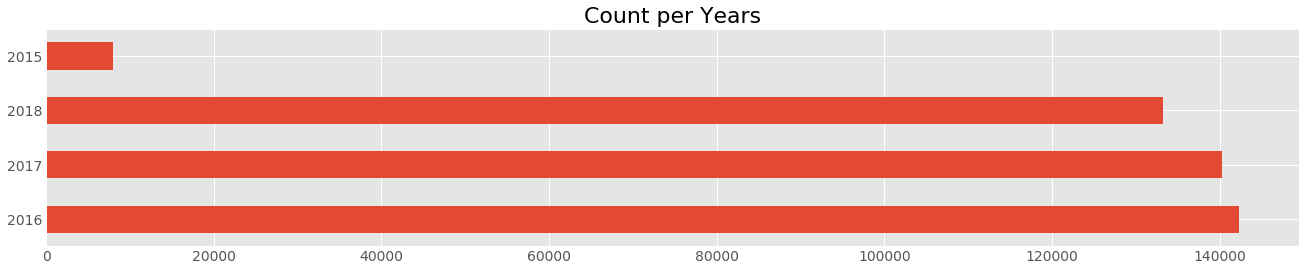

In [193]:
plt.figure(figsize=(20, 4))
plt.title('Count per Years')
df['year'].value_counts().plot(kind='barh')
plt.show()

### Contagem de chamadas por dia

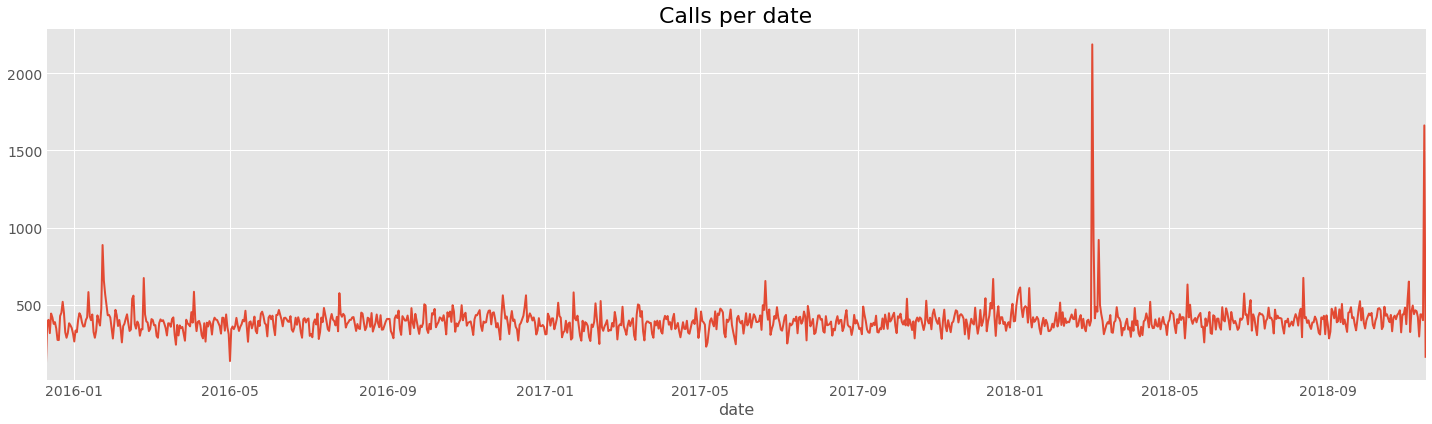

In [194]:
plt.figure(figsize=(20, 6))
df.groupby('date').count()['twp'].plot()
plt.title('Calls per date')
plt.tight_layout()
plt.show()

Agor vamos verificar a distribuição dos dados para cada uma dos motivos de ligações existentes nas chamadas ao **911**.

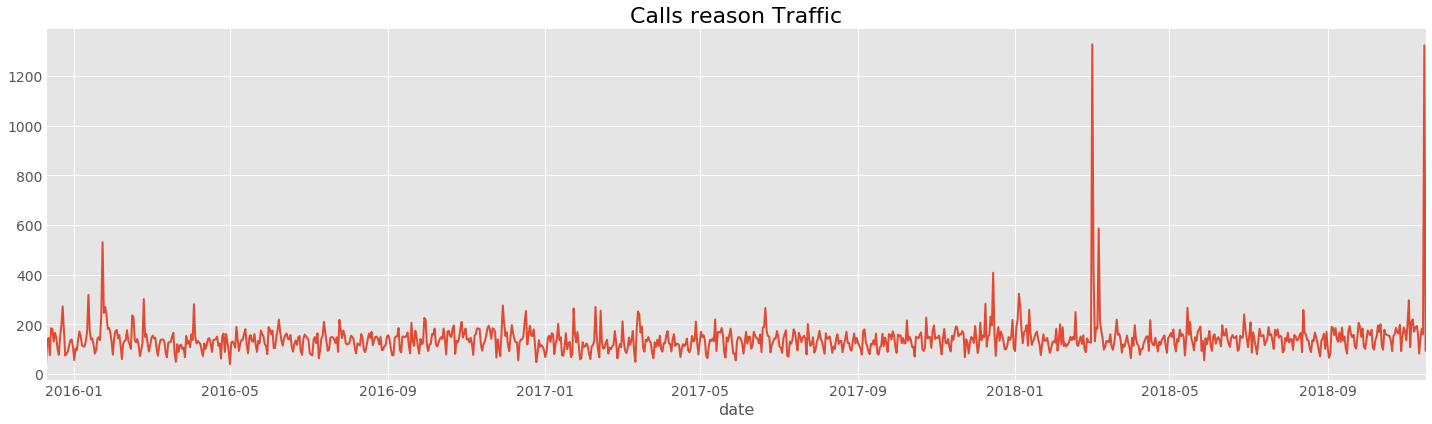

In [198]:
plt.figure(figsize=(20, 6))
df[df['reason'] == 'Traffic'].groupby('date').count()['twp'].plot()
plt.title('Calls reason Traffic')
plt.tight_layout()
plt.show()

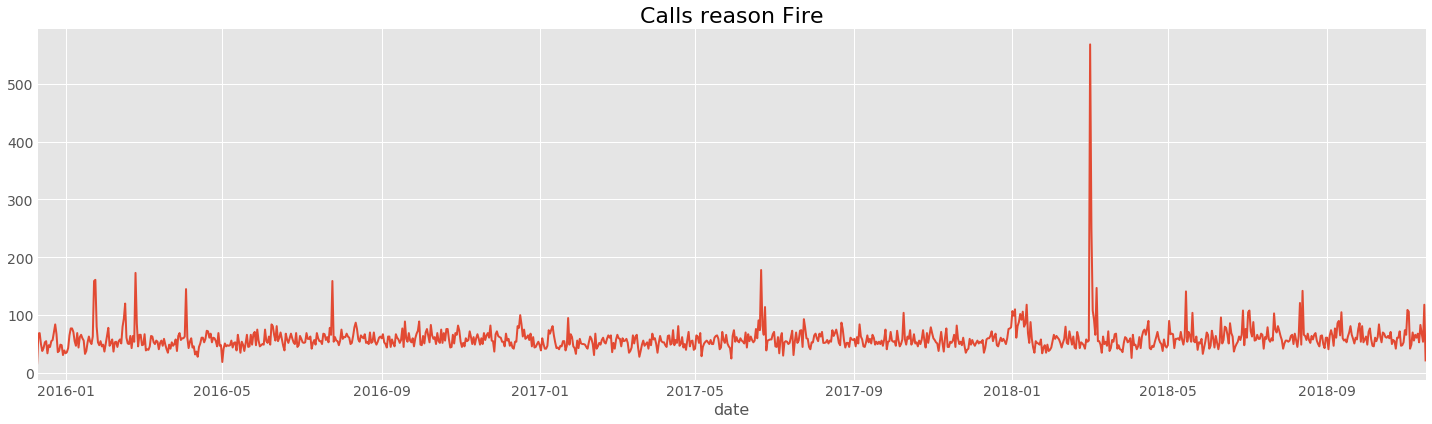

In [199]:
plt.figure(figsize=(20, 6))
df[df['reason'] == 'Fire'].groupby('date').count()['twp'].plot()
plt.title('Calls reason Fire')
plt.tight_layout()
plt.show()

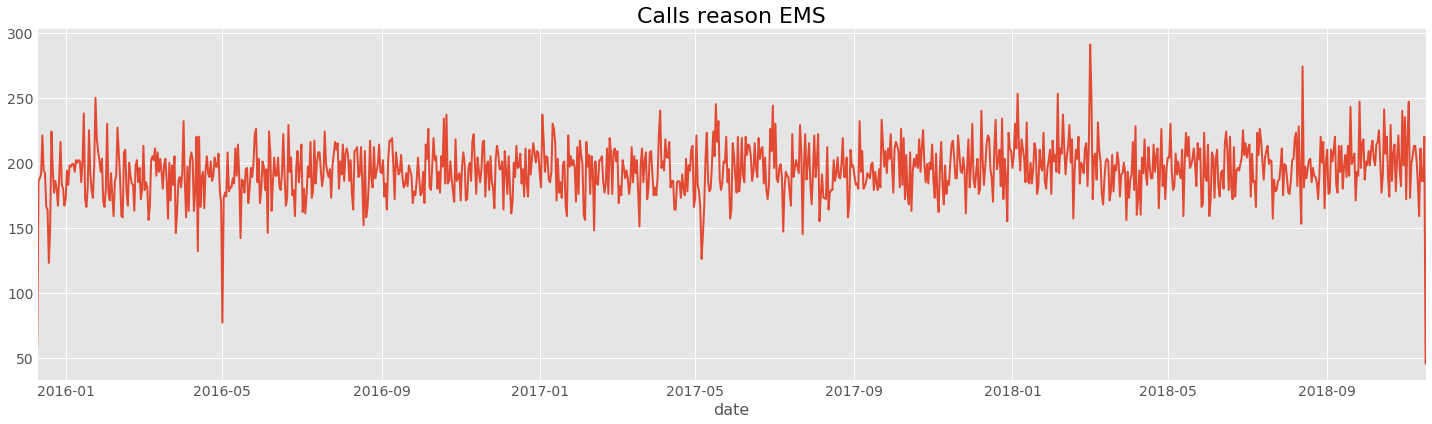

In [200]:
plt.figure(figsize=(20, 6))
df[df['reason'] == 'EMS'].groupby('date').count()['twp'].plot()
plt.title('Calls reason EMS')
plt.tight_layout()
plt.show()

### Heatmap (Mapa de Calor)

Quero visualizar a relação entre as horas e os dias da semana em relação aos chamados. Para isso vamos utilizar o `heatmap`, ou mapa de calor. 

Para a criação do mapa de calor, vamos reestruturar o dataframe para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html).

In [201]:
dayHour = df.groupby(by=['day_of_week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


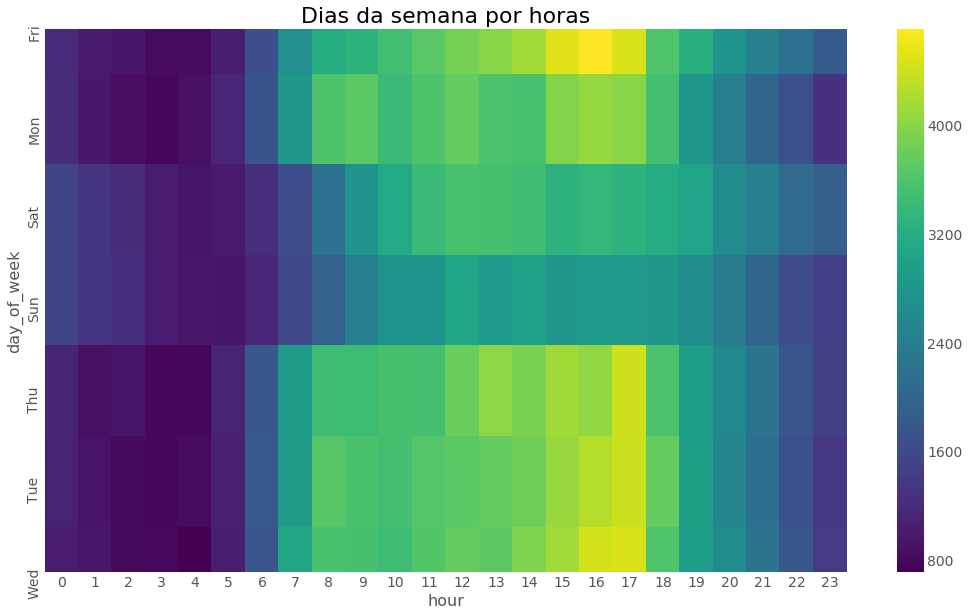

In [205]:
plt.figure(figsize=(16,10))
sns.heatmap(dayHour,cmap='viridis')
plt.title('Dias da semana por horas')
plt.show()

### clustermap - day and hour

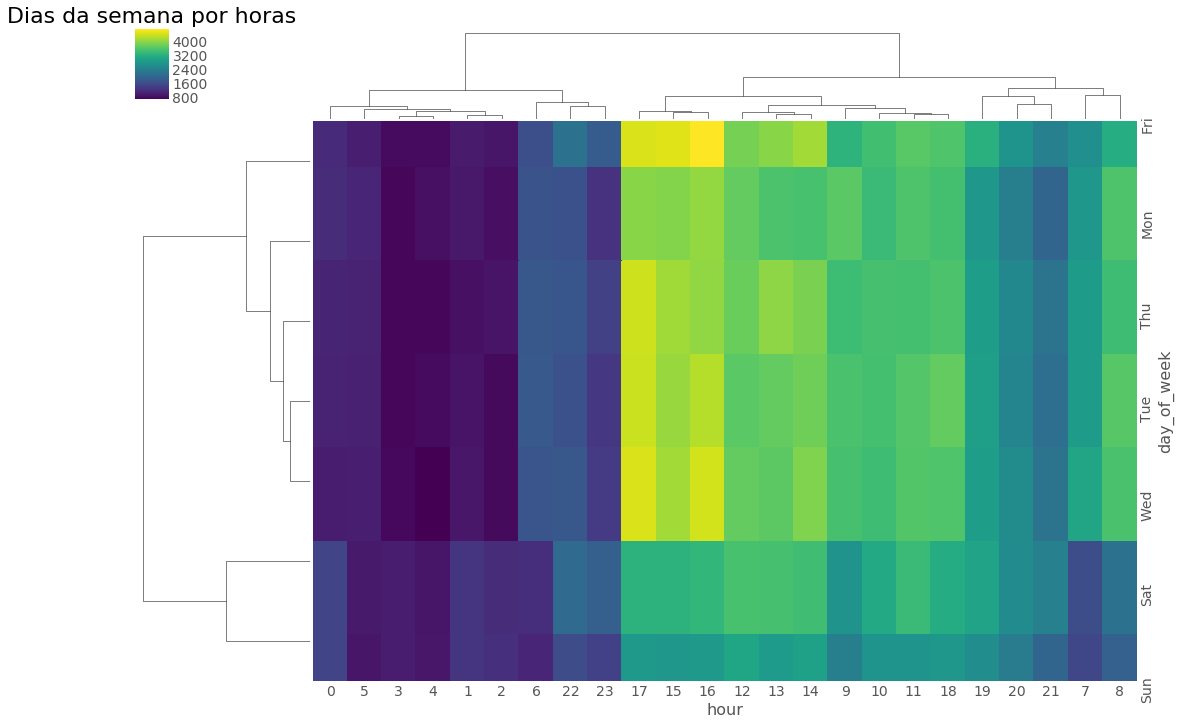

In [206]:
sns.clustermap(dayHour,cmap='viridis', figsize=(16, 12))
plt.title('Dias da semana por horas')
plt.show()

In [208]:
dayMonth = df.groupby(by=['day_of_week','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899


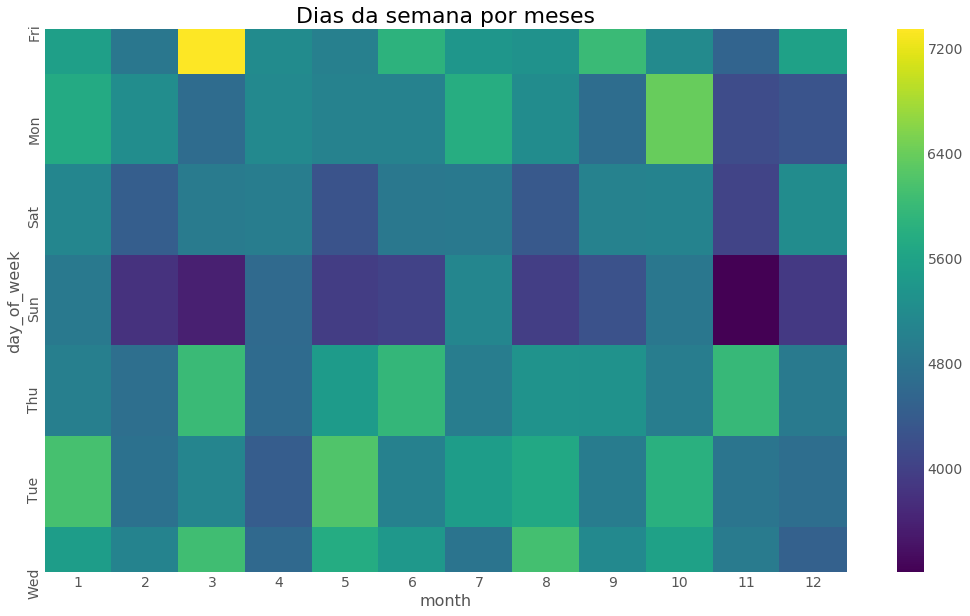

In [209]:
plt.figure(figsize=(16,10))
sns.heatmap(dayMonth,cmap='viridis')
plt.title('Dias da semana por meses')
plt.show()

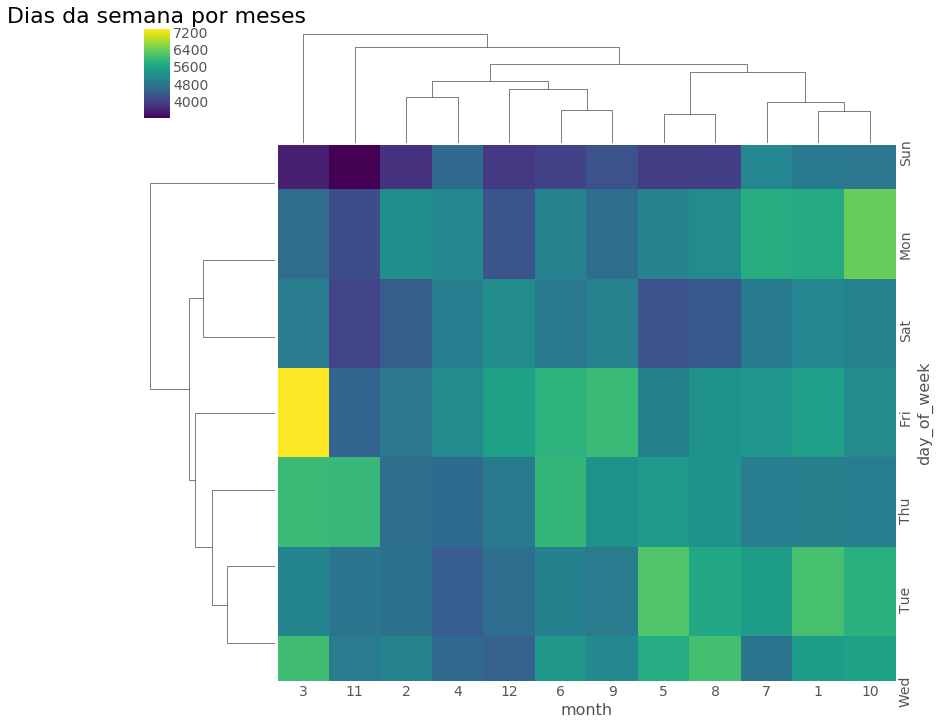

In [210]:
sns.clustermap(dayMonth,cmap='viridis', figsize=(12, 12))
plt.title('Dias da semana por meses')
plt.show()

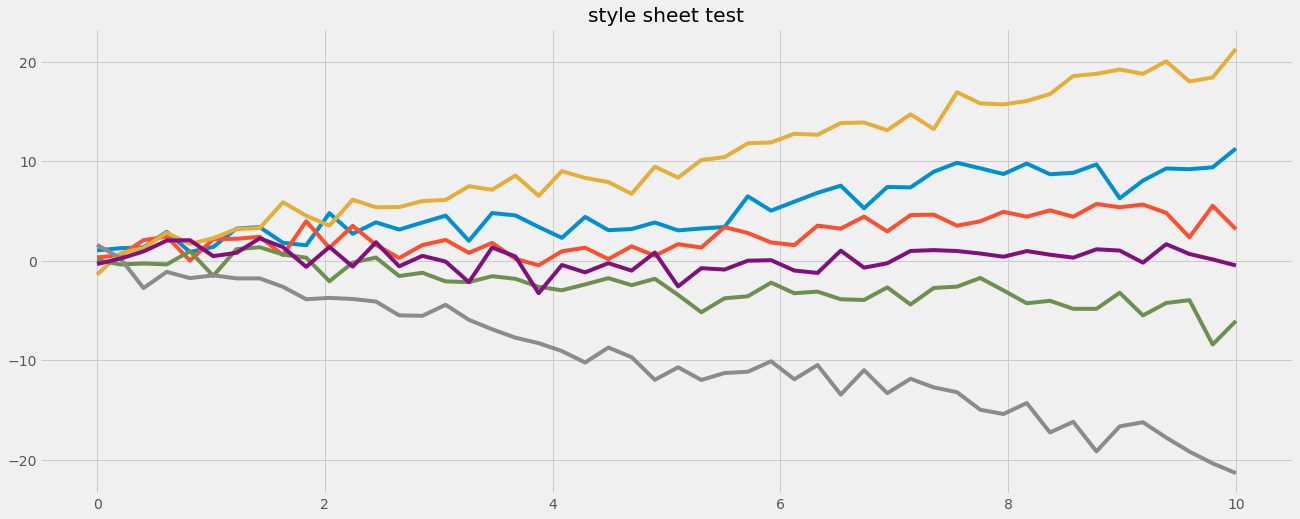

In [213]:
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')
x = np.linspace(0, 10)
# Fixing random state for reproducibility
np.random.seed(19680801)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("style sheet test")
plt.show()